In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/similarity_dataset/similarity_dataset.csv")

df.head()

,title,body,portal,date_published,title2,body2,portal2,date_published2,choice
0,"Potpisan je ugovor: za vrtić 1,45 milijuna eura",SLATINA - Grad Slatina sklopio je s Ministarst...,glas-slavonije.hr,2023-03-19 00:00:00,"Đakovu 1,7 mil. eura za vrtiće Sjever i Vila","Đakovu 1,7 mil. eura za vrtiće Sjever i Vila\n...",glas-slavonije.hr,2023-03-15 00:00:00,3
1,"Rešicki: Umažanke ne smijemo podcijeniti, ali ...",ŽRK OSIJEK DOMAĆIN U 18. KOLU PRVE HRL\nRukome...,glas-slavonije.hr,2023-03-18 00:00:00,Ovo je vjerojatno najslađa kućica koju ćete ik...,"Ima kupaonicu, garderobu s praonicom, kuhinju ...",jutarnji.hr,2023-02-28 00:00:00,0
2,Alić: Copy-paste kultura proizvela je copy-pas...,PROF. DR. SC. SEAD ALIĆ Hrvatski filozof i knj...,glas-slavonije.hr,2023-03-18 00:00:00,Orban: Treći svjetski rat? Nikad nismo bili ov...,MAĐARSKI premijer Viktor Orban je jutros na dr...,index.hr,2023-03-01 00:00:00,1
3,HOK pozdravlja nastavak mjera,Hrvatska obrtnička komora izražava zadovoljstv...,glas-slavonije.hr,2023-03-16 00:00:00,Hrvatska obrtnička komora: Pozdravljamo nastav...,'POKAZALI DA SU SVJESNI TEŽINE SITUACIJE'\nHrv...,direktno.hr,2023-03-01 00:00:00,5
4,Hrgović: Prozivali ste me kada sam se borio sa...,Hvala mojim pratiteljima na porukama podrške n...,24sata.hr,2023-03-16 00:00:00,Bahata Sandra Benčić izvrijeđala glasače HDZ-a...,Stranka Možemo održala je izbornu skupštinu i ...,teleskop.hr,2023-03-01 00:00:00,0


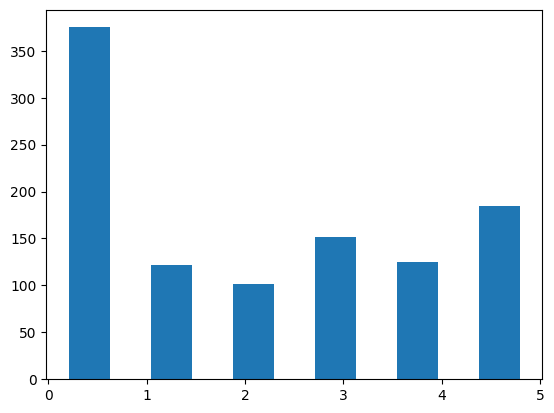

Percentages: 
0    35.377358
1    11.509434
2     9.528302
3    14.339623
4    11.792453
5    17.452830
Name: choice, dtype: float64


In [6]:
plt.hist(df["choice"], bins=6, rwidth=0.5)
plt.savefig("../figures/label_distribution.png")
plt.show()

print(f"Percentages: \n{df['choice'].value_counts(normalize=True).sort_index() * 100}")

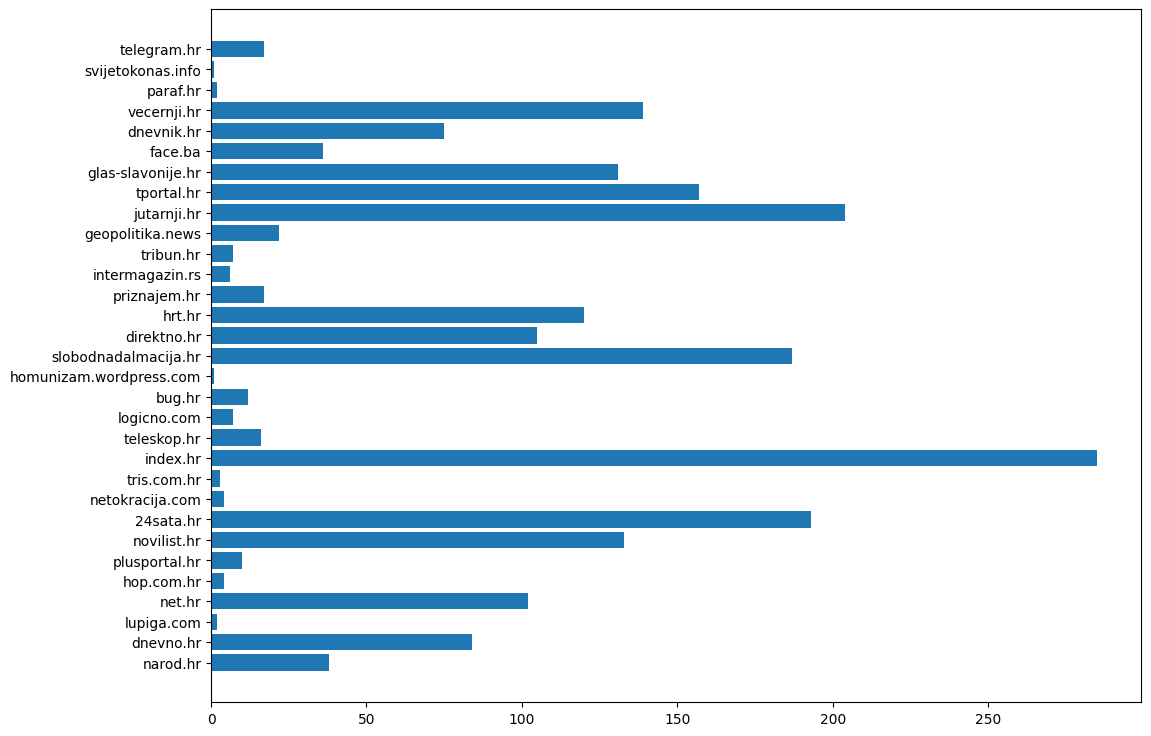

In [7]:
all_portals = df["portal"].values.tolist()
all_portals.extend(df["portal2"].values.tolist())
d = {p: np.sum([p == i for i in all_portals]) for p in set(all_portals)}

plt.figure(figsize=(12, 9))
#plt.xticks(rotation=90, ha='right')
plt.barh(list(d.keys()), d.values())
plt.savefig("../figures/portal_distribution.png")
plt.show()

In [8]:
df["date_published"] =  pd.to_datetime(df["date_published"], format='%Y-%m-%d 00:00:00')
df["date_published2"] =  pd.to_datetime(df["date_published2"], format='%Y-%m-%d 00:00:00')

print(df["date_published"].min(), df["date_published"].max())
print(df["date_published2"].min(), df["date_published2"].max())

2023-02-20 00:00:00 2023-03-19 00:00:00
2023-02-20 00:00:00 2023-03-21 00:00:00
